<a href="https://colab.research.google.com/github/AKSHTMISHRA/Analysis/blob/main/Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving train_u6lujuX_CVtuZ9i.csv to train_u6lujuX_CVtuZ9i.csv


In [ ]:
#importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt



**DATA processing **

In [ ]:
data=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
data.shape

(614, 13)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
#checking null values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#dropping null values
data=data.dropna()
data.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


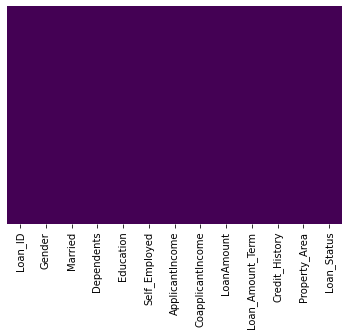

In [ ]:
#checking null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

## data preprocessing 


In [ ]:
#replacing the values with integers
data.columns 
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [ ]:
#label encoding
data.replace({"Gender":{"Female":1,"Male":0}},inplace=True)
data.replace({"Married":{"Yes":1,"No":0}},inplace=True)
data.replace({"Self_Employed":{"Yes":1,"No":0}},inplace=True)
data.replace({"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)
data.replace({"Property_Area":{"Urban":1,"Rural":0,"Semiurban":2}},inplace=True)
data.replace({"Loan_Status":{"Y":1,"N":0}},inplace=True)

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


DATA VISUALISATION 

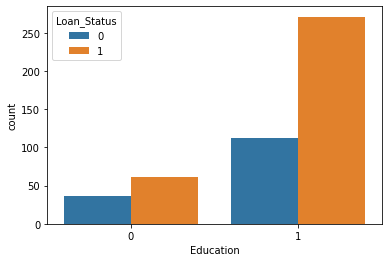

In [ ]:
#checking education of applied customer
sns.countplot(x='Education',hue='Loan_Status',data=data)

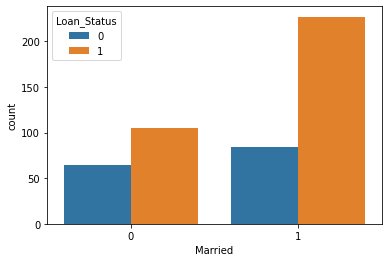

In [ ]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

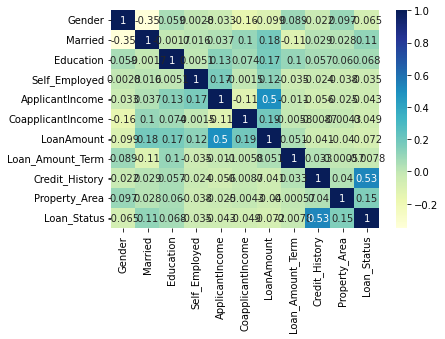

In [ ]:
correlation_matrix=data.corr()
sns.heatmap(correlation_matrix,cmap="YlGnBu",annot=True)